Decision Tree for Classification

In [1]:
#importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
#loading the dataset 
dataset = load_iris()
iris_df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [13]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
dir(dataset)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [15]:
iris_df["target"] = dataset.target

In [16]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
#checking target names
dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [44]:
#checking the targets
iris_df["target"].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [17]:
#labelling the data
x = iris_df.iloc[:,:-1]
y = iris_df["target"]

In [18]:
print(x)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [37]:
#splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=51)
print(x.shape,x_train.shape,x_test.shape)

(150, 4) (120, 4) (30, 4)


In [38]:
#training the model with deafult parameters
model = tree.DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


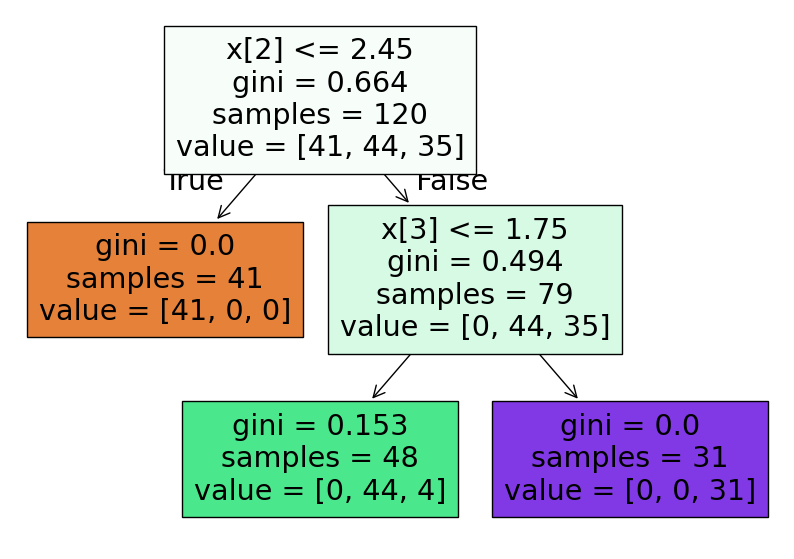

In [39]:
#visualising the model
plt.figure(figsize=(10,7))
tree.plot_tree(model,filled=True)
plt.show()

After visualising with default parameters and without pruning , we can say that we need to set the max_depth = 2 , in order to prune the model and boost it's performance

In [40]:
# after post pruning predicting using the model
x_test_predict = model.predict(x_test)

#printing the accuracy score
from sklearn.metrics import accuracy_score
x_test_accuracy = accuracy_score(x_test_predict,y_test)
print("The accuracy score of test data: ",x_test_accuracy*100, "%")

The accuracy score of test data:  93.33333333333333 %


In [43]:
#evaluating using f1score
from sklearn.metrics import f1_score
f1_value = f1_score(x_test_predict,y_test,average="weighted")
print("f1 score for test data: ",f1_value*100,"%")

f1 score for test data:  93.33333333333333 %


In [41]:
#evaluating the model using classification report
print(classification_report(x_test_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      0.83      0.83         6
           2       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30

